In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt


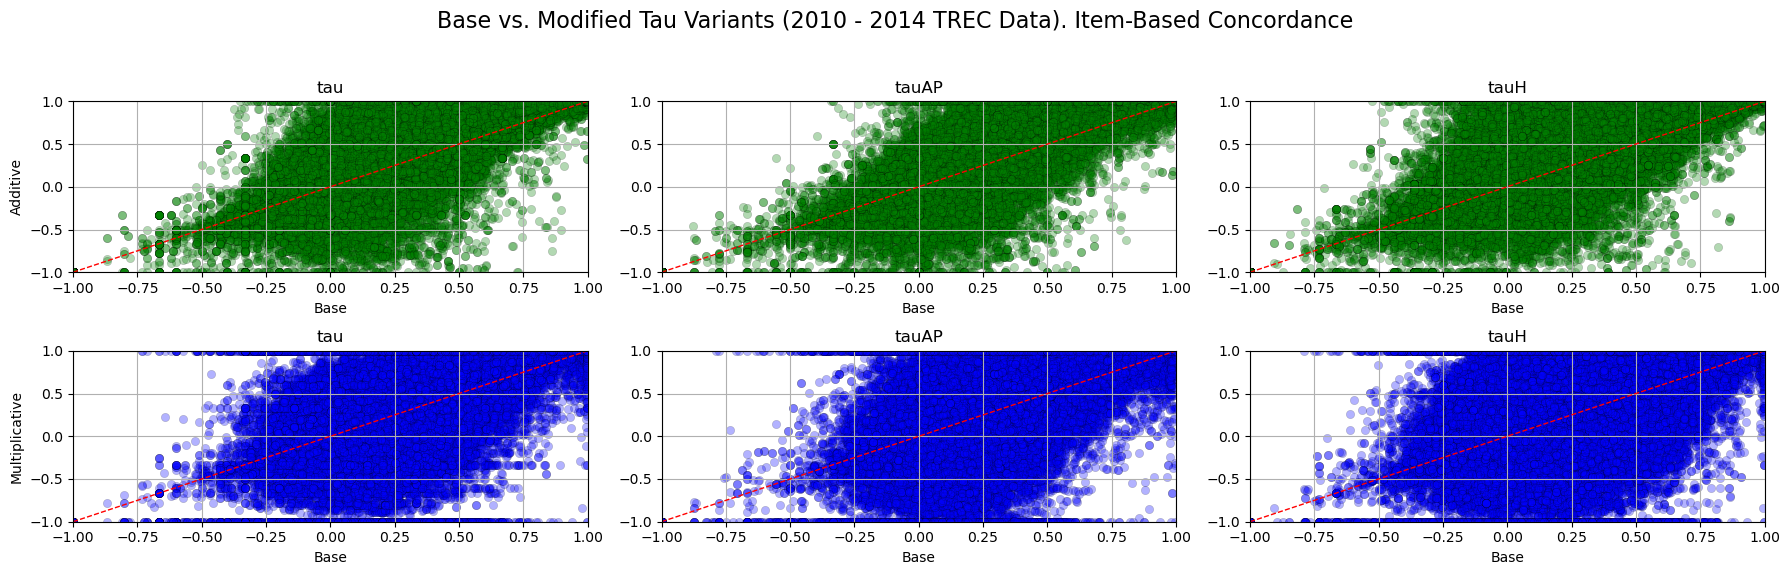

In [19]:
folders = ['2010', '2011', '2012', '2013', '2014']

all_data = {
    "tau": [], "tau_a": [], "tau_m": [],
    "tauAP": [], "tauAP_a": [], "tauAP_m": [],
    "tauH": [], "tauH_a": [], "tauH_m": []
}

for folder in folders:
    df = pd.read_csv(f"output/{folder}.csv")
    parsed_data = df.map(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    for key in all_data:
        all_data[key].extend(parsed_data[key])

methods = ["Base", "Additive", "Multiplicative"]
colors = ["lightblue", "lightgreen", "lightcoral"]
variants = ["tau", "tauAP", "tauH"]

fig, axes = plt.subplots(2, 3, figsize=(18, 6))
fig.suptitle("Base vs. Modified Tau Variants (2010 - 2014 TREC Data). Item-Based Concordance", fontsize=16)

for idx, variant in enumerate(variants):
    base = all_data[variant]
    additive = all_data[f"{variant}_a"]
    multiplicative = all_data[f"{variant}_m"]

    ax_add = axes[0, idx]
    base_add, additive_filtered = zip(*[(b, a) for b, a in zip(base, additive) if a != 0])
    ax_add.scatter(base_add, additive_filtered, alpha=0.3, color="green", edgecolor='black', linewidth=0.3)
    ax_add.plot([-1, 1], [-1, 1], linestyle='--', color='red', linewidth=1)
    ax_add.set_title(f"{variant}")
    ax_add.set_xlim(-1, 1)
    ax_add.set_ylim(-1, 1)
    if idx == 0:
        ax_add.set_ylabel("Additive")
    ax_add.set_xlabel("Base")
    ax_add.grid(True)

    ax_mult = axes[1, idx]
    base_mult, multiplicative_filtered = zip(*[(b, m) for b, m in zip(base, multiplicative) if m != 0])
    ax_mult.scatter(base_mult, multiplicative_filtered, alpha=0.3, color="blue", edgecolor='black', linewidth=0.3)
    ax_mult.plot([-1, 1], [-1, 1], linestyle='--', color='red', linewidth=1)
    ax_mult.set_title(f"{variant}")
    ax_mult.set_xlim(-1, 1)
    ax_mult.set_ylim(-1, 1)
    if idx == 0:
        ax_mult.set_ylabel("Multiplicative")
    ax_mult.set_xlabel("Base")
    ax_mult.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

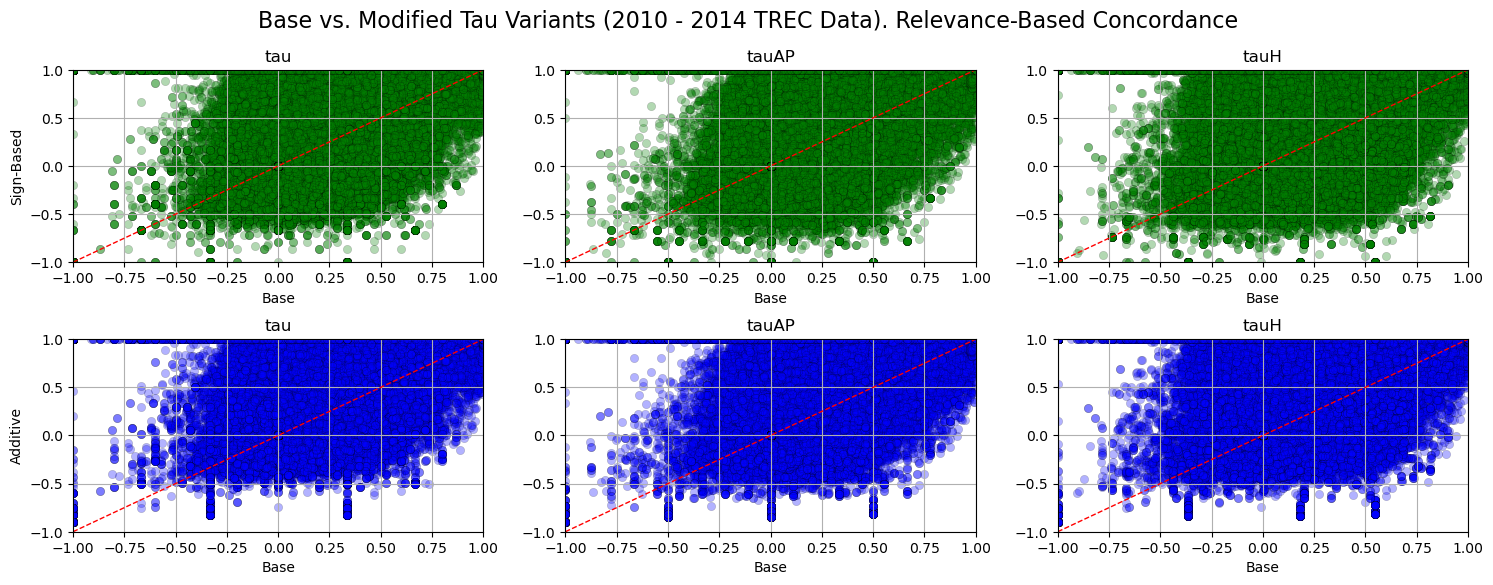

In [20]:
folders = ['2010', '2011', '2012', '2013', '2014']

all_data = {
    "tau": [], "tau_s": [], "tau_ar": [],
    "tauAP": [], "tauAP_s": [], "tauAP_ar": [],
    "tauH": [], "tauH_s": [], "tauH_ar": []
}

for folder in folders:
    df = pd.read_csv(f"output/{folder}.csv")
    parsed_data = df.map(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    for key in all_data:
        all_data[key].extend(parsed_data[key])

methods = ["Base", "Sign-Based", "Additive"]
variants = ["tau", "tauAP", "tauH"]

fig, axes = plt.subplots(2, 3, figsize=(18, 6))
fig.suptitle("Base vs. Modified Tau Variants (2010 - 2014 TREC Data). Relevance-Based Concordance", fontsize=16)

for idx, variant in enumerate(variants):
    base = all_data[variant]
    sign = all_data[f"{variant}_s"]

    ax_mult = axes[0, idx]
    ax_mult.scatter(base, sign, alpha=0.3, color="green", edgecolor='black', linewidth=0.3)
    ax_mult.plot([-1, 1], [-1, 1], linestyle='--', color='red', linewidth=1)
    ax_mult.set_title(f"{variant}")
    ax_mult.set_xlim(-1, 1)
    ax_mult.set_ylim(-1, 1)
    if idx == 0:
        ax_mult.set_ylabel("Sign-Based")
    ax_mult.set_xlabel("Base")
    ax_mult.grid(True)
    
    base = all_data[variant]
    additive = all_data[f"{variant}_ar"]

    ax_mult = axes[1, idx]
    ax_mult.scatter(base, additive, alpha=0.3, color="blue", edgecolor='black', linewidth=0.3)
    ax_mult.plot([-1, 1], [-1, 1], linestyle='--', color='red', linewidth=1)
    ax_mult.set_title(f"{variant}")
    ax_mult.set_xlim(-1, 1)
    ax_mult.set_ylim(-1, 1)
    if idx == 0:
        ax_mult.set_ylabel("Additive")
    ax_mult.set_xlabel("Base")
    ax_mult.grid(True)
    
plt.subplots_adjust(hspace=0.4)
plt.show()

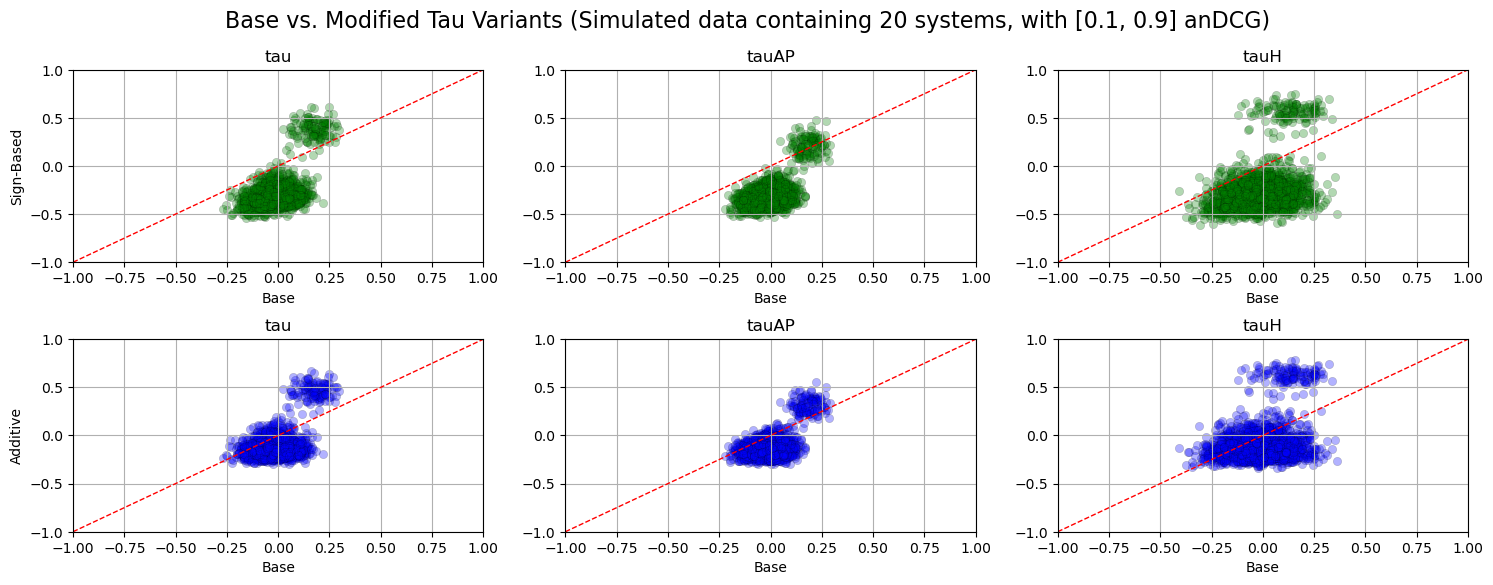

In [21]:
folders = ['simulated_data_3']

all_data = {
    "tau": [], "tau_b": [], "tau_a": [],
    "tauAP": [], "tauAP_b": [], "tauAP_a": [],
    "tauH": [], "tauH_b": [], "tauH_a": []
}

for folder in folders:
    df = pd.read_csv(f"output/{folder}.csv")
    parsed_data = df.map(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    for key in all_data:
        all_data[key].extend(parsed_data[key])

methods = ["Base", "Sign", "Additive"]
variants = ["tau", "tauAP", "tauH"]

fig, axes = plt.subplots(2, 3, figsize=(18, 6))
fig.suptitle("Base vs. Modified Tau Variants (Simulated data containing 20 systems, with [0.1, 0.9] anDCG)", fontsize=16)

for idx, variant in enumerate(variants):
    base = all_data[variant]
    sign = all_data[f"{variant}_b"]

    ax_mult = axes[0, idx]
    ax_mult.scatter(base, sign, alpha=0.3, color="green", edgecolor='black', linewidth=0.3)
    ax_mult.plot([-1, 1], [-1, 1], linestyle='--', color='red', linewidth=1)
    ax_mult.set_title(f"{variant}")
    ax_mult.set_xlim(-1, 1)
    ax_mult.set_ylim(-1, 1)
    if idx == 0:
        ax_mult.set_ylabel("Sign-Based")
    ax_mult.set_xlabel("Base")
    ax_mult.grid(True)
    
    base = all_data[variant]
    additive = all_data[f"{variant}_a"]

    ax_mult = axes[1, idx]
    ax_mult.scatter(base, additive, alpha=0.3, color="blue", edgecolor='black', linewidth=0.3)
    ax_mult.plot([-1, 1], [-1, 1], linestyle='--', color='red', linewidth=1)
    ax_mult.set_title(f"{variant}")
    ax_mult.set_xlim(-1, 1)
    ax_mult.set_ylim(-1, 1)
    if idx == 0:
        ax_mult.set_ylabel("Additive")
    ax_mult.set_xlabel("Base")
    ax_mult.grid(True)
    
plt.subplots_adjust(hspace=0.4)
plt.show()

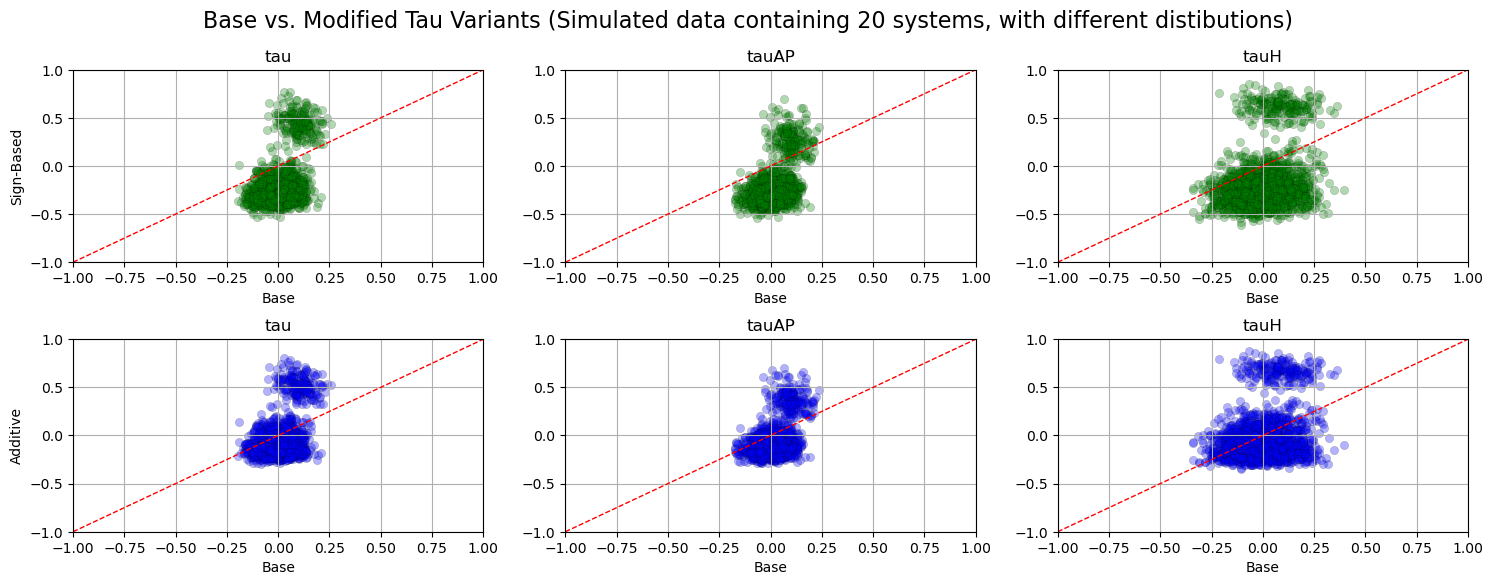

In [22]:
folders = ['simulated_data_4']

all_data = {
    "tau": [], "tau_b": [], "tau_a": [],
    "tauAP": [], "tauAP_b": [], "tauAP_a": [],
    "tauH": [], "tauH_b": [], "tauH_a": []
}

for folder in folders:
    df = pd.read_csv(f"output/{folder}.csv")
    parsed_data = df.map(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    for key in all_data:
        all_data[key].extend(parsed_data[key])

methods = ["Base", "Sign", "Additive"]
variants = ["tau", "tauAP", "tauH"]

fig, axes = plt.subplots(2, 3, figsize=(18, 6))
fig.suptitle("Base vs. Modified Tau Variants (Simulated data containing 20 systems, with different distibutions)", fontsize=16)

for idx, variant in enumerate(variants):
    base = all_data[variant]
    sign = all_data[f"{variant}_b"]

    ax_mult = axes[0, idx]
    ax_mult.scatter(base, sign, alpha=0.3, color="green", edgecolor='black', linewidth=0.3)
    ax_mult.plot([-1, 1], [-1, 1], linestyle='--', color='red', linewidth=1)
    ax_mult.set_title(f"{variant}")
    ax_mult.set_xlim(-1, 1)
    ax_mult.set_ylim(-1, 1)
    if idx == 0:
        ax_mult.set_ylabel("Sign-Based")
    ax_mult.set_xlabel("Base")
    ax_mult.grid(True)
    
    base = all_data[variant]
    additive = all_data[f"{variant}_a"]

    ax_mult = axes[1, idx]
    ax_mult.scatter(base, additive, alpha=0.3, color="blue", edgecolor='black', linewidth=0.3)
    ax_mult.plot([-1, 1], [-1, 1], linestyle='--', color='red', linewidth=1)
    ax_mult.set_title(f"{variant}")
    ax_mult.set_xlim(-1, 1)
    ax_mult.set_ylim(-1, 1)
    if idx == 0:
        ax_mult.set_ylabel("Additive")
    ax_mult.set_xlabel("Base")
    ax_mult.grid(True)
    
plt.subplots_adjust(hspace=0.4)
plt.show()

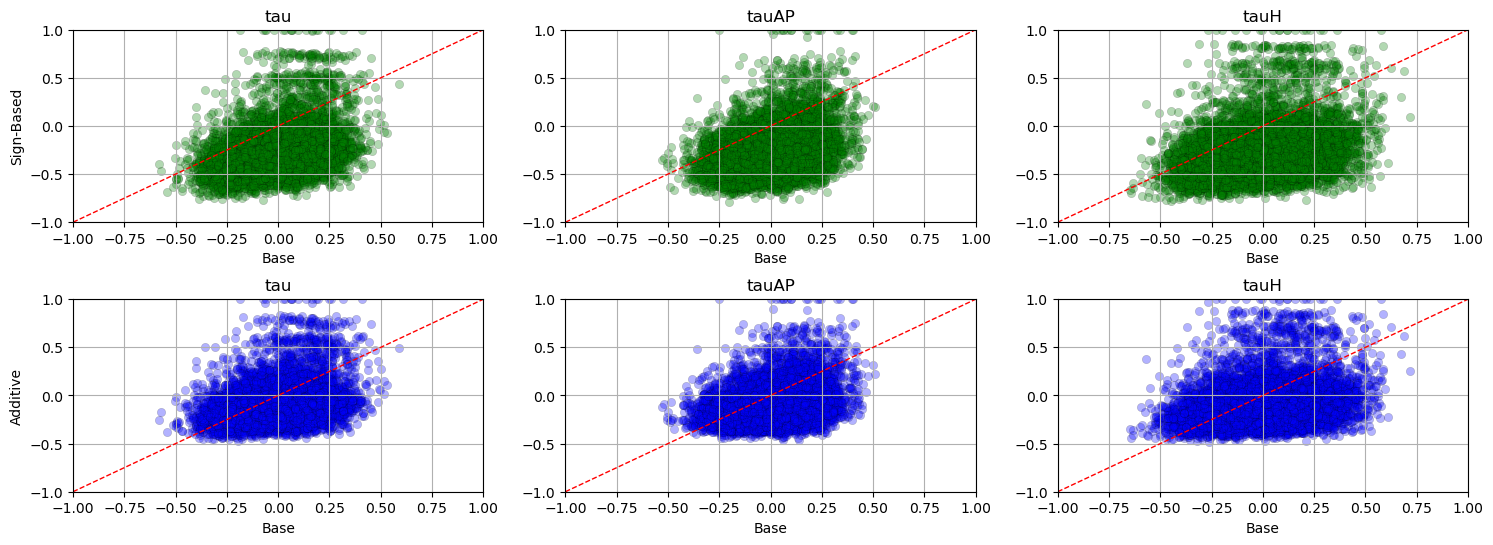

In [23]:
folders = ['simulated_data_5']

all_data = {
    "tau": [], "tau_s": [], "tau_ar": [],
    "tauAP": [], "tauAP_s": [], "tauAP_ar": [],
    "tauH": [], "tauH_s": [], "tauH_ar": []
}

for folder in folders:
    df = pd.read_csv(f"output/{folder}.csv")
    parsed_data = df.map(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    for key in all_data:
        all_data[key].extend(parsed_data[key])

methods = ["Base", "Sign", "Additive"]
variants = ["tau", "tauAP", "tauH"]

fig, axes = plt.subplots(2, 3, figsize=(18, 6))

for idx, variant in enumerate(variants):
    base = all_data[variant]
    sign = all_data[f"{variant}_s"]

    ax_mult = axes[0, idx]
    ax_mult.scatter(base, sign, alpha=0.3, color="green", edgecolor='black', linewidth=0.3)
    ax_mult.plot([-1, 1], [-1, 1], linestyle='--', color='red', linewidth=1)
    ax_mult.set_title(f"{variant}")
    ax_mult.set_xlim(-1, 1)
    ax_mult.set_ylim(-1, 1)
    if idx == 0:
        ax_mult.set_ylabel("Sign-Based")
    ax_mult.set_xlabel("Base")
    ax_mult.grid(True)
    
    base = all_data[variant]
    additive = all_data[f"{variant}_ar"]

    ax_mult = axes[1, idx]
    ax_mult.scatter(base, additive, alpha=0.3, color="blue", edgecolor='black', linewidth=0.3)
    ax_mult.plot([-1, 1], [-1, 1], linestyle='--', color='red', linewidth=1)
    ax_mult.set_title(f"{variant}")
    ax_mult.set_xlim(-1, 1)
    ax_mult.set_ylim(-1, 1)
    if idx == 0:
        ax_mult.set_ylabel("Additive")
    ax_mult.set_xlabel("Base")
    ax_mult.grid(True)
    
plt.subplots_adjust(hspace=0.4)
plt.show()

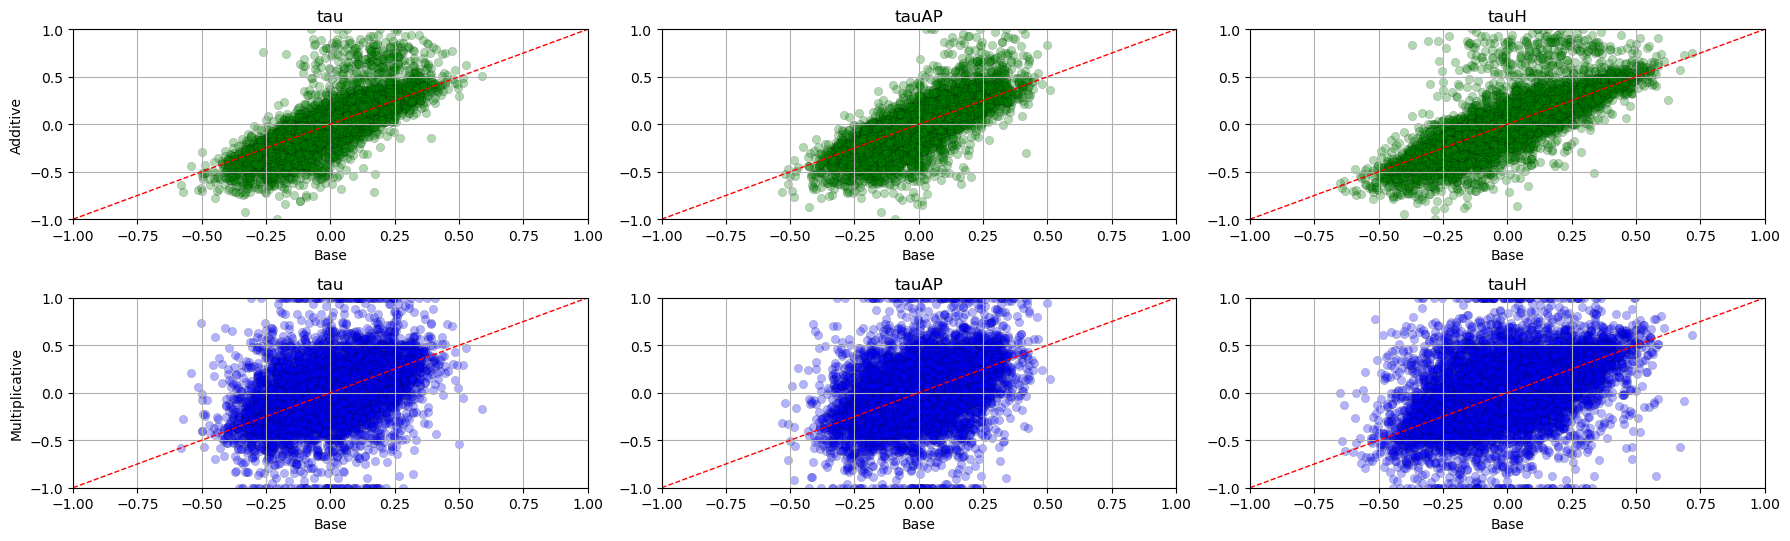

In [24]:
folders = ['simulated_data_5']

all_data = {
    "tau": [], "tau_a": [], "tau_m": [],
    "tauAP": [], "tauAP_a": [], "tauAP_m": [],
    "tauH": [], "tauH_a": [], "tauH_m": []
}

for folder in folders:
    df = pd.read_csv(f"output/{folder}.csv")
    parsed_data = df.map(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    for key in all_data:
        all_data[key].extend(parsed_data[key])

methods = ["Base", "Additive", "Multiplicative"]
colors = ["lightblue", "lightgreen", "lightcoral"]
variants = ["tau", "tauAP", "tauH"]

fig, axes = plt.subplots(2, 3, figsize=(18, 6))

for idx, variant in enumerate(variants):
    base = all_data[variant]
    additive = all_data[f"{variant}_a"]
    multiplicative = all_data[f"{variant}_m"]

    ax_add = axes[0, idx]
    base_add, additive_filtered = zip(*[(b, a) for b, a in zip(base, additive) if a != 0])
    ax_add.scatter(base_add, additive_filtered, alpha=0.3, color="green", edgecolor='black', linewidth=0.3)
    ax_add.plot([-1, 1], [-1, 1], linestyle='--', color='red', linewidth=1)
    ax_add.set_title(f"{variant}")
    ax_add.set_xlim(-1, 1)
    ax_add.set_ylim(-1, 1)
    if idx == 0:
        ax_add.set_ylabel("Additive")
    ax_add.set_xlabel("Base")
    ax_add.grid(True)

    ax_mult = axes[1, idx]
    base_mult, multiplicative_filtered = zip(*[(b, m) for b, m in zip(base, multiplicative) if m != 0])
    ax_mult.scatter(base_mult, multiplicative_filtered, alpha=0.3, color="blue", edgecolor='black', linewidth=0.3)
    ax_mult.plot([-1, 1], [-1, 1], linestyle='--', color='red', linewidth=1)
    ax_mult.set_title(f"{variant}")
    ax_mult.set_xlim(-1, 1)
    ax_mult.set_ylim(-1, 1)
    if idx == 0:
        ax_mult.set_ylabel("Multiplicative")
    ax_mult.set_xlabel("Base")
    ax_mult.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [25]:
from tabulate import tabulate

folders = ['2010', '2011', '2012', '2013', '2014']

# Variants and base categories
variants = ['s', 'ar', 'a', 'm']
categories = ['tau', 'tauAP', 'tauH']

all_data = []
for folder in folders:
    path = f"output/{folder}.csv"
    df = pd.read_csv(path)
    all_data.append(df)

# Combine into a single DataFrame
df_all = pd.concat(all_data, ignore_index=True)

def summarize_differences(base_name):
    base = df[base_name].values
    n = len(base)
    table = []

    for v in variants:
        col = f"{base_name}_{v}"
        values = df[col].values
        diffs = np.abs(values - base)

        avg_diff = np.mean(diffs)
        max_diff = np.max(diffs)
        M = np.sum((diffs > 0.01) & (diffs <= 0.1)) / n * 100
        L = np.sum(diffs > 0.1) / n * 100

        table.append([f"|{base_name} - {col}|", f"{avg_diff:.2f}", f"{max_diff:.2f}", f"{M:.2f}%", f"{L:.2f}%"])

    return table

# Print all tables
for category in categories:
    print(f"\n=== {category.upper()} ===")
    headers = ["Variant", "Avg.", "Max.", "M", "L"]
    print(tabulate(summarize_differences(category), headers=headers, tablefmt="grid"))



=== TAU ===
+----------------+--------+--------+--------+--------+
| Variant        |   Avg. |   Max. | M      | L      |
+================+========+========+========+========+
| |tau - tau_s|  |   0.36 |   2    | 14.33% | 74.42% |
+----------------+--------+--------+--------+--------+
| |tau - tau_ar| |   0.34 |   2    | 16.55% | 72.47% |
+----------------+--------+--------+--------+--------+
| |tau - tau_a|  |   0.16 |   1.58 | 33.95% | 51.29% |
+----------------+--------+--------+--------+--------+
| |tau - tau_m|  |   0.24 |   2    | 24.53% | 63.50% |
+----------------+--------+--------+--------+--------+

=== TAUAP ===
+--------------------+--------+--------+--------+--------+
| Variant            |   Avg. |   Max. | M      | L      |
+====================+========+========+========+========+
| |tauAP - tauAP_s|  |   0.34 |   2    | 14.73% | 74.21% |
+--------------------+--------+--------+--------+--------+
| |tauAP - tauAP_ar| |   0.32 |   2    | 17.58% | 71.16% |
+------------

In [9]:
import pandas as pd
import numpy as np
from tabulate import tabulate

folders = ['simulated_data_5']

# Variants and base categories
variants = ['s', 'ar', 'a', 'm']
categories = ['tau', 'tauAP', 'tauH']

all_data = []
for folder in folders:
    path = f"output/{folder}.csv"
    df = pd.read_csv(path)
    all_data.append(df)

# Combine into a single DataFrame
df_all = pd.concat(all_data, ignore_index=True)

def summarize_differences(base_name):
    base = df_all[base_name].values.astype(np.float64)
    table = []

    for v in variants:
        col = f"{base_name}_{v}"
        values = df_all[col].values.astype(np.float64)

        # Use a mask to exclude NaNs in either base or values
        mask = ~np.isnan(base) & ~np.isnan(values)
        diffs = np.abs(values[mask] - base[mask])
        n = len(diffs)

        if n == 0:
            avg_diff = max_diff = M = L = float('nan')
        else:
            avg_diff = np.nanmean(diffs)
            max_diff = np.nanmax(diffs)
            M = np.sum((diffs > 0.01) & (diffs <= 0.1)) / n * 100
            L = np.sum(diffs > 0.1) / n * 100

        table.append([f"|{base_name} - {col}|", f"{avg_diff:.2f}", f"{max_diff:.2f}", f"{M:.2f}%", f"{L:.2f}%"])

    return table

# Print all tables
for category in categories:
    print(f"\n=== {category.upper()} ===")
    headers = ["Variant", "Avg.", "Max.", "M", "L"]
    print(tabulate(summarize_differences(category), headers=headers, tablefmt="grid"))



=== TAU ===
+----------------+--------+--------+--------+--------+
| Variant        |   Avg. |   Max. | M      | L      |
+================+========+========+========+========+
| |tau - tau_s|  |   0.31 |   1.19 | 11.61% | 87.20% |
+----------------+--------+--------+--------+--------+
| |tau - tau_ar| |   0.19 |   1.19 | 27.19% | 69.57% |
+----------------+--------+--------+--------+--------+
| |tau - tau_a|  |   0.1  |   1.08 | 60.69% | 30.04% |
+----------------+--------+--------+--------+--------+
| |tau - tau_m|  |   0.18 |   1.31 | 37.13% | 58.33% |
+----------------+--------+--------+--------+--------+

=== TAUAP ===
+--------------------+--------+--------+--------+--------+
| Variant            |   Avg. |   Max. | M      | L      |
+====================+========+========+========+========+
| |tauAP - tauAP_s|  |   0.31 |   1.25 | 12.09% | 86.45% |
+--------------------+--------+--------+--------+--------+
| |tauAP - tauAP_ar| |   0.19 |   1.25 | 28.38% | 68.17% |
+------------